###  PCA and Clustering

#####      This data set contains a total 5820 evaluation scores provided by students from Gazi University in Ankara (Turkey). There is a total of 28 course specific questions and additional 5 attributes.

- Kmeans Clustering
- Hierarchical Clustering
- Selected the output of K-means/hierarchical cluster either one and bind the data back to the original data, group the data based on the cluster and given an inference
- PCA
- Models applied after get the cluster from PCA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Data Ingestion

In [2]:
data=pd.read_csv('turkey.csv')
data.shape

(5820, 33)

In [3]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
data.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(data),columns=data.columns)

### KMEANS

In [9]:
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,192060.000000
1,2,105150.065103
2,3,73956.687450
3,4,65555.558929
4,5,60429.485186
5,6,57626.854512
6,7,55864.947984
7,8,54489.574164
8,9,52876.745117


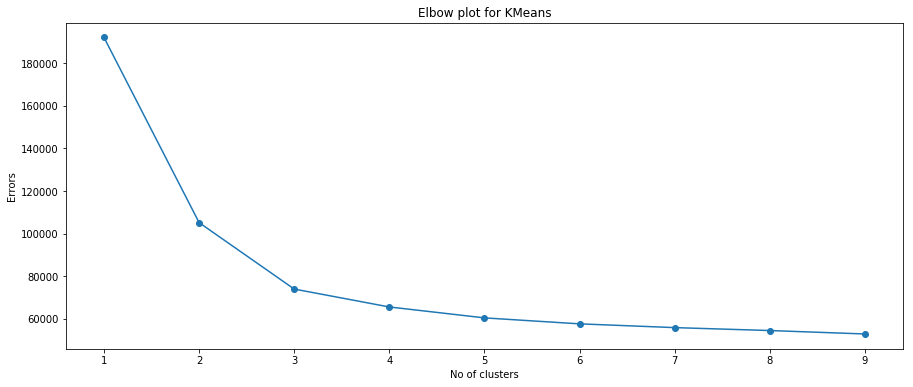

In [11]:
from sklearn.cluster import KMeans
cluster_range = range(1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data)

  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )

# Elbow plot
plt.figure(figsize=(15,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title('Elbow plot for KMeans')
plt.xlabel('No of clusters')
plt.ylabel('Errors')
plt.show()

The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

- I have consider the Four clusters in the dataste

### Hierarchical algorithm

In [12]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
model.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [13]:
Z = linkage(data, 'ward')
c, coph_dists = cophenet(Z , pdist(data))

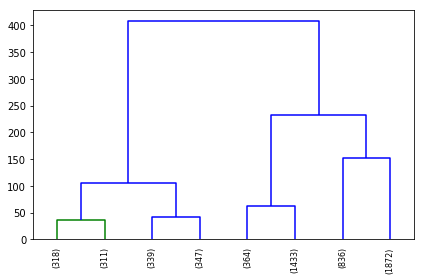

In [14]:
dendrogram(Z,p=2,truncate_mode='level', leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

### Convert Unsupervised data into Supervised data:

In [15]:
# I have consider four number of clusters from the elbow plot
from sklearn.cluster import KMeans
cluster_range = range(1, 5)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_ )

In [16]:
prediction=clusters.predict(data)
data["clusters"] = prediction

In [17]:
data['clusters'].value_counts()

3    2102
2    1667
0    1199
1     852
Name: clusters, dtype: int64

### PCA

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = pd.DataFrame(sc.fit_transform(data),columns=data.columns)

In [19]:
pca=PCA()

In [20]:
pca_sc=pca.fit_transform(data_scaled)

In [22]:
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,197880.000000
1,2,108988.950555
2,3,74582.039038
3,4,65555.702748
4,5,61310.890886
5,6,58474.824832
6,7,56702.356793
7,8,55304.518920
8,9,53929.197506


In [24]:
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',  linkage='ward')
model.fit(pca_sc)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [25]:
pca_sc=pd.DataFrame(pca_sc,columns=data.columns)

In [26]:
pca_sc['labels'] = model.labels_
pca_sc_clusters = pca_sc.groupby(['labels']).count()
pca_sc_clusters
#data2_groups=data2_clusters.head(1599)#This creates a pandas dataframegroupby object

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,clusters
labels,,,,,,,,,,,,,,,,,,,,,
0,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,...,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536
1,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,...,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
2,2079,2079,2079,2079,2079,2079,2079,2079,2079,2079,...,2079,2079,2079,2079,2079,2079,2079,2079,2079,2079


In [27]:
Z = linkage(pca_sc, 'ward')
c, coph_dists = cophenet(Z , pdist(pca_sc))

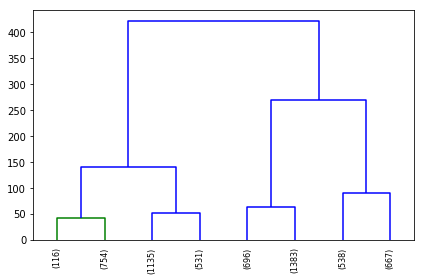

In [28]:
dendrogram(Z,p=2,truncate_mode='level', leaf_rotation=90.,color_threshold =50, leaf_font_size=8.0)
plt.tight_layout()

### Split the dataset without PCA

In [31]:
X=data.drop('clusters',axis=1)
y=data['clusters']

In [32]:
from sklearn.model_selection import train_test_split

In [38]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=10)

In [39]:
models = [('Logistic Regression', LogisticRegression()), 
          ('Decision Trees', DecisionTreeClassifier()),  
          ('KNN', KNeighborsClassifier()), 
          ('Naive Bayes', GaussianNB())]
seed = 7
results = []
names = []

In [40]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.907201 (0.018039)
Decision Trees: 0.916049 (0.008593)
KNN: 0.953604 (0.009433)
Naive Bayes: 0.959008 (0.009131)


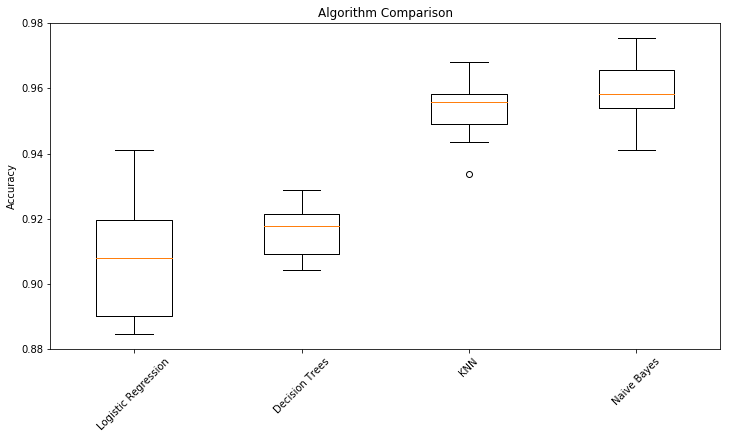

In [41]:
fig, ax = plt.subplots(figsize=(12,6))
plt.boxplot(results)
plt.title('Algorithm Comparison')
ax.set_xticklabels(names,rotation=45)
plt.ylabel('Accuracy')
plt.show()

###  Split train and test with PCA

In [42]:
pca=PCA()
pca_xtrain=pca.fit_transform(Xtrain)
pca_xtest=pca.transform(Xtest)

In [43]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, pca_xtrain, Ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.906955 (0.018294)
Decision Trees: 0.989936 (0.002788)
KNN: 0.953604 (0.009433)
Naive Bayes: 0.723125 (0.023472)


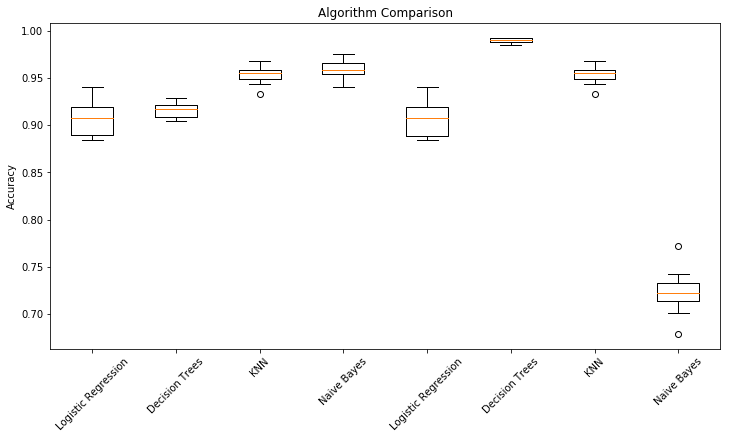

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
plt.boxplot(results)
plt.title('Algorithm Comparison')
ax.set_xticklabels(names,rotation=45)
plt.ylabel('Accuracy')
plt.show()

- We got better accuracy for pca with the model of Decision Tree
- Navies Bayes not shown good results for the PCA

### Final Model

In [45]:
names=['LR','DT','KNN','Navies Bayes','LR_PCA','DT_PCA','KNN_PCA','BAYES_PCA']
accuracy=[0.906,0.913,0.953,0.958,0.906,0.989,0.953,0.722]
output=pd.DataFrame(names)

In [46]:
output['Accuracy']=accuracy

In [47]:
output.rename({0:'Models'},axis=1,inplace=True)

In [48]:
output

,Models,Accuracy
0,LR,0.906
1,DT,0.913
2,KNN,0.953
3,Navies Bayes,0.958
4,LR_PCA,0.906
5,DT_PCA,0.989
6,KNN_PCA,0.953
7,BAYES_PCA,0.722


- After PCA applied the accuracy score has been increased for Decision Tree (0.913 to 0.989)
- After PCA applied the accuracy has decreses for Navie Bayes(0.958 to 0.722)
- PCA not gives good results for navie bayes
- Decision tree always performs very good when we have less features beacuse its tends to overfit
- 